# Topic Models (LDA)
Leah Hogenmiller (lmh2ur)

## Set Up

In [48]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import plotly_express as px
colors = "YlGnBu"
import warnings
warnings.filterwarnings('ignore')

In [49]:
ngram_range = [1,2]
n_terms = 5000
n_topics = 20
max_iter = 20
n_top_terms = 10

In [50]:
OHCO = ['book_id', 'chap_id', 'para_id']
PARA = OHCO[:3]
CHAP = OHCO[:2]
BOOK = OHCO[:1]

In [51]:
BAG = CHAP

## Importing Tables

In [52]:
LIB = pd.read_csv('LIB.csv').set_index('book_id')
CORPUS = pd.read_csv('CORPUS.csv')

## Functions

In [53]:
def create_doc(TOKEN, BAG):
    DOCS = TOKEN[TOKEN.pos.str.match(r'^NNS?$')]\
            .groupby(BAG).term_str\
            .apply(lambda x: ' '.join(x))\
            .to_frame()\
            .rename(columns={'term_str':'doc_str'})
    return DOCS

In [54]:
def vector_space(DOCS):
    count_engine = CountVectorizer(max_features=5000, ngram_range=[1,2], stop_words='english')
    count_model = count_engine.fit_transform(DOCS.doc_str)
    TERMS = count_engine.get_feature_names_out()
    
    VOCAB = pd.DataFrame(index=TERMS)
    VOCAB.index.name = 'term_str'
    DTM = pd.DataFrame(count_model.toarray(), index=DOCS.index, columns=TERMS)
    VOCAB['doc_count'] = DTM.astype('bool').astype('int').sum()
    DOCS['term_count'] = DTM.sum(1)
    
    return count_model, TERMS, VOCAB, DTM, DOCS

In [55]:
def gen_model(count_model, DOCS, TERMS):
    lda_engine = LDA(n_components=20, max_iter=5, learning_offset=50., random_state=0)
    TNAMES = [f"T{str(x).zfill(len(str(20)))}" for x in range(20)]
    
    lda_model = lda_engine.fit_transform(count_model)
    
    THETA = pd.DataFrame(lda_model, index=DOCS.index)
    THETA.columns.name = 'topic_id'
    THETA.columns = TNAMES
    
    PHI = pd.DataFrame(lda_engine.components_, columns=TERMS, index=TNAMES)
    PHI.index.name = 'topic_id'
    PHI.columns.name  = 'term_str'
    
    return THETA, PHI, TNAMES

## LDA

In [56]:
DOCS = create_doc(CORPUS, BAG) 

In [57]:
count_model, TERMS, VOCAB, DTM, DOCS = vector_space(DOCS)

In [58]:
THETA, PHI, TNAMES = gen_model(count_model, DOCS, TERMS)

In [59]:
TOPICS = PHI.stack().to_frame('topic_weight').groupby('topic_id')\
    .apply(lambda x: x.sort_values('topic_weight', ascending=False)\
        .head(10).reset_index().drop('topic_id', axis=1)['term_str'])

In [60]:
THETA

T00       T01       T02       T03       T04       T05  \
book_id chap_id                                                               
244     1        0.016899  0.000024  0.000024  0.000024  0.000024  0.000024   
        2        0.000034  0.000034  0.000034  0.000034  0.000034  0.000034   
        3        0.000026  0.000026  0.000026  0.000026  0.000026  0.000026   
        4        0.000479  0.000032  0.000032  0.000032  0.000032  0.000032   
834     1        0.592168  0.000031  0.000031  0.014887  0.000031  0.000031   
...                   ...       ...       ...       ...       ...       ...   
70114   14       0.000069  0.000069  0.000069  0.000069  0.000069  0.000069   
        15       0.000082  0.000082  0.000082  0.000082  0.000082  0.000082   
        16       0.000075  0.000075  0.000075  0.000075  0.000075  0.000075   
        17       0.000103  0.033174  0.000103  0.000103  0.000103  0.000103   
        18       0.000104  0.000104  0.000104  0.000104  0.000104  0.000104   

                      T06       T07       T08       T09       T10       T11  \
book_id chap_id                                                               
244     1        0.000024  0.000024  0.076732  0.000024  0.000024  0.000024   
        2        0.000034  0.000034  0.000034  0.000034  0.022253  0.000034   
        3        0.000026  0.000026  0.000026  0.000026  0.000026  0.000026   
        4        0.000032  0.000032  0.000032  0.000032  0.000032  0.000032   
834     1        0.000031  0.000031  0.000031  0.040610  0.000031  0.000031   
...                   ...       ...       ...       ...       ...       ...   
70114   14       0.000069  0.000069  0.000069  0.000069  0.164617  0.000069   
        15       0.000082  0.000082  0.000082  0.000082  0.830204  0.000082   
        16       0.000075  0.000075  0.000075  0.000075  0.469537  0.000075   
        17       0.000103  0.000103  0.000103  0.000103  0.243700  0.000103   
        18       0.000104  0.000104  0.000104  0.000104  0.142116  0.000104   

                      T12       T13       T14       T15       T16       T17  \
book_id chap_id                                                               
244     1        0.000024  0.000024  0.202204  0.266373  0.437438  0.000024   
        2        0.000034  0.000034  0.092549  0.590531  0.294129  0.000034   
        3        0.000026  0.000026  0.714576  0.000026  0.284950  0.000026   
        4        0.000032  0.000032  0.468473  0.054432  0.476108  0.000032   
834     1        0.000031  0.000031  0.198432  0.153436  0.000031  0.000031   
...                   ...       ...       ...       ...       ...       ...   
70114   14       0.000069  0.821091  0.013115  0.000069  0.000069  0.000069   
        15       0.000082  0.000082  0.168320  0.000082  0.000082  0.000082   
        16       0.000075  0.000075  0.243910  0.000075  0.285271  0.000075   
        17       0.000103  0.000103  0.489455  0.000103  0.232026  0.000103   
        18       0.000104  0.000104  0.144616  0.000104  0.711509  0.000104   

                      T18       T19  
book_id chap_id                      
244     1        0.000024  0.000024  
        2        0.000034  0.000034  
        3        0.000026  0.000026  
        4        0.000032  0.000032  
834     1        0.000031  0.000031  
...                   ...       ...  
70114   14       0.000069  0.000069  
        15       0.000082  0.000082  
        16       0.000075  0.000075  
        17       0.000103  0.000103  
        18       0.000104  0.000104  

[241 rows x 20 columns]

In [61]:
THETA.to_csv('THETA.csv')

In [62]:
PHI.T

topic_id,T00,T01,T02,T03,T04,T05,T06,T07,T08,T09,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19
term_str,,,,,,,,,,,,,,,,,,,,
aback,1.006213,0.050000,0.050000,0.050000,0.05,3.265247,1.758469,0.05,0.050000,0.050000,8.432639,0.05,0.050000,0.050000,0.050000,0.050000,7.787432,0.05,0.050000,0.05
abilities,0.682552,0.050000,0.050000,0.050000,0.05,0.050000,1.050000,0.05,0.050000,1.050000,1.873237,0.05,0.050000,0.050000,0.050000,0.050002,3.594208,0.05,0.050000,0.05
ability,1.918288,0.050000,0.050000,2.576729,0.05,0.166589,0.050000,0.05,0.050000,0.050000,2.950468,0.05,0.050000,0.050000,3.557289,0.098252,1.097562,0.05,1.034823,0.05
abode,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.090575,0.05,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,4.982926,1.050000,1.076500,0.05,1.050000,0.05
abroad,0.050000,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,0.05,0.050000,0.050000,4.021916,0.05,0.050000,0.050000,1.419810,0.708273,0.050000,0.05,0.050000,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youre wrong,0.302498,0.050000,0.050000,0.050000,0.05,0.050000,0.050000,0.05,0.050000,0.050000,1.122210,0.05,0.050000,0.050000,0.050000,0.742820,3.032472,0.05,0.050000,0.05
youth,7.247531,2.813854,0.050000,0.050000,0.05,0.050000,1.949879,0.05,0.050000,1.072457,0.050000,0.05,0.050000,1.579803,6.601114,0.373655,13.761707,0.05,1.050000,0.05
youve,3.556767,0.236327,1.102027,0.572540,0.05,0.050000,9.016958,0.05,3.827695,2.986620,28.321491,0.05,1.153135,1.391991,6.178214,12.404973,27.901263,0.05,0.050000,0.05


In [63]:
PHI.T.to_csv('PHI.csv')

In [64]:
TOPICS['label'] = TOPICS.apply(lambda x: x.name + ' ' + ', '.join(x[:n_top_terms]), 1)
TOPICS['doc_weight_sum'] = THETA.sum()
TOPICS['term_freq'] = PHI.sum(1) / PHI.sum(1).sum()

In [65]:
TOPICS

term_str,0,1,2,3,4,5,6,7,8,9,label,doc_weight_sum,term_freq
topic_id,,,,,,,,,,,,,
T00,room,man,door,hand,time,house,face,way,yes,night,"T00 room, man, door, hand, time, house, face, ...",18.301546,0.121215
T01,monsieur,magistrate,man,madame,crime,woman,head,door,yes,time,"T01 monsieur, magistrate, man, madame, crime, ...",14.329850,0.037269
T02,man,night,room,way,time,sir,bicycle,candle,fellow,moment,"T02 man, night, room, way, time, sir, bicycle,...",4.397134,0.014698
T03,man,case,time,way,friend,hound,mutton,death,day,matter,"T03 man, case, time, way, friend, hound, mutto...",3.565127,0.013484
T04,tuppence,woman,bell,door,visitor,day,girl,maam,kind,money,"T04 tuppence, woman, bell, door, visitor, day,...",0.560147,0.002975
T05,dictaphone,murderer,person,summer house,shoes,crime,summer,house,point,time,"T05 dictaphone, murderer, person, summer house...",2.296715,0.006846
T06,man,time,way,night,hand,thing,place,head,house,things,"T06 man, time, way, night, hand, thing, place,...",13.010936,0.042128
T07,hound,moor,fog,initials,path,creature,seaman,track,game,mire,"T07 hound, moor, fog, initials, path, creature...",0.689638,0.005250
T08,man,house,room,case,way,face,time,thing,hand,eyes,"T08 man, house, room, case, way, face, time, t...",7.519122,0.030058


In [66]:
TOPICS.to_csv('TOPICS.csv')

## Analysis

<AxesSubplot:ylabel='label'>

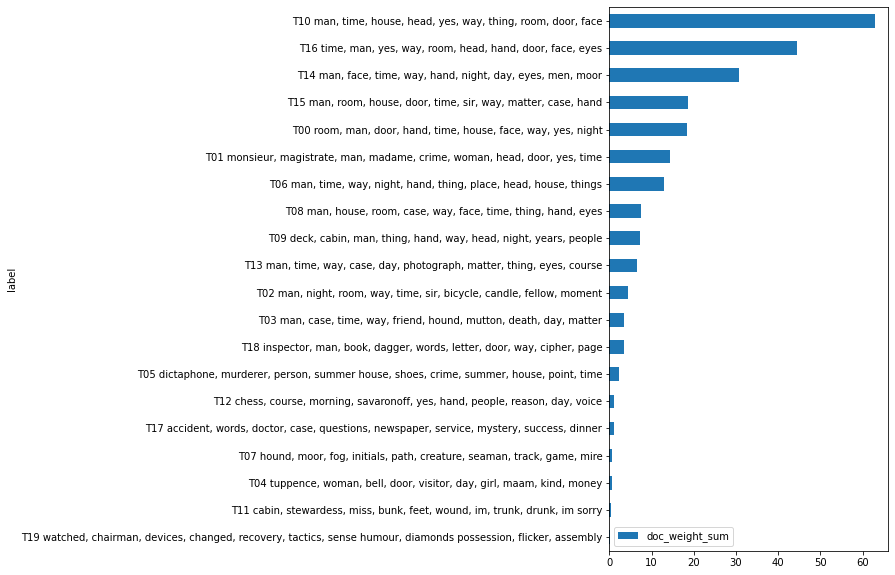

In [67]:
TOPICS.sort_values('doc_weight_sum', ascending=True).plot.barh(y='doc_weight_sum', x='label', figsize=(5, n_topics/2))

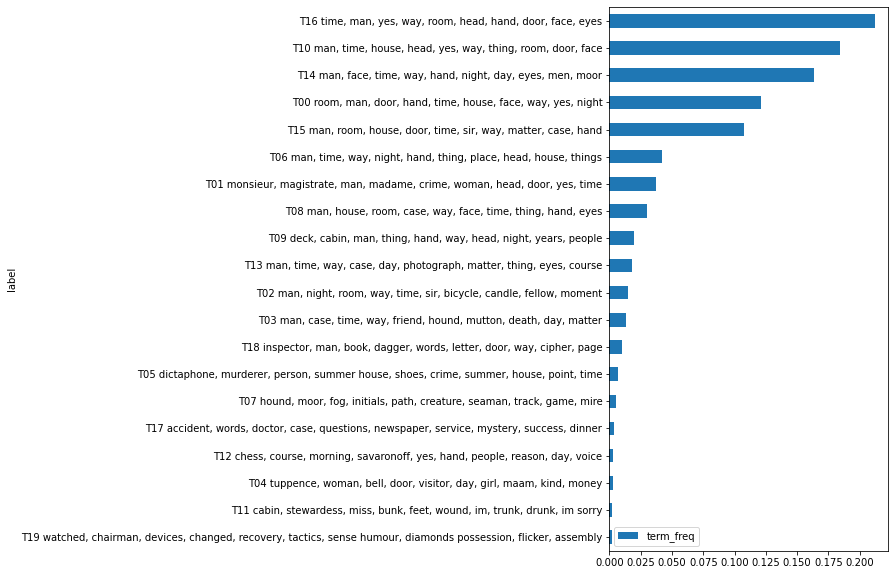

In [68]:
TOPICS.sort_values('term_freq', ascending=True).plot.barh(y='term_freq', x='label', figsize=(5,n_topics/2));

In [69]:
AUTHORS = sorted(LIB.author.value_counts().index.to_list())

In [70]:
TOPICS[AUTHORS] = THETA.join(LIB, on='book_id').groupby('author')[TNAMES].mean().T

In [71]:
TOPICS

term_str,0,1,2,3,4,5,6,7,8,9,label,doc_weight_sum,term_freq,Agatha Christie,Arthur Conan Doyle
topic_id,,,,,,,,,,,,,,,
T00,room,man,door,hand,time,house,face,way,yes,night,"T00 room, man, door, hand, time, house, face, ...",18.301546,0.121215,0.041573,0.163374
T01,monsieur,magistrate,man,madame,crime,woman,head,door,yes,time,"T01 monsieur, magistrate, man, madame, crime, ...",14.329850,0.037269,0.082805,0.000068
T02,man,night,room,way,time,sir,bicycle,candle,fellow,moment,"T02 man, night, room, way, time, sir, bicycle,...",4.397134,0.014698,0.015297,0.025746
T03,man,case,time,way,friend,hound,mutton,death,day,matter,"T03 man, case, time, way, friend, hound, mutto...",3.565127,0.013484,0.014610,0.015260
T04,tuppence,woman,bell,door,visitor,day,girl,maam,kind,money,"T04 tuppence, woman, bell, door, visitor, day,...",0.560147,0.002975,0.003211,0.000068
T05,dictaphone,murderer,person,summer house,shoes,crime,summer,house,point,time,"T05 dictaphone, murderer, person, summer house...",2.296715,0.006846,0.013212,0.000162
T06,man,time,way,night,hand,thing,place,head,house,things,"T06 man, time, way, night, hand, thing, place,...",13.010936,0.042128,0.055460,0.050240
T07,hound,moor,fog,initials,path,creature,seaman,track,game,mire,"T07 hound, moor, fog, initials, path, creature...",0.689638,0.005250,0.000148,0.009765
T08,man,house,room,case,way,face,time,thing,hand,eyes,"T08 man, house, room, case, way, face, time, t...",7.519122,0.030058,0.023102,0.051800


In [72]:
TOPICS[AUTHORS + ['label']].style.background_gradient(cmap=colors, axis=None)

term_str,Agatha Christie,Arthur Conan Doyle,label
topic_id,,,
T00,0.041573,0.163374,"T00 room, man, door, hand, time, house, face, way, yes, night"
T01,0.082805,0.000068,"T01 monsieur, magistrate, man, madame, crime, woman, head, door, yes, time"
T02,0.015297,0.025746,"T02 man, night, room, way, time, sir, bicycle, candle, fellow, moment"
T03,0.014610,0.015260,"T03 man, case, time, way, friend, hound, mutton, death, day, matter"
T04,0.003211,0.000068,"T04 tuppence, woman, bell, door, visitor, day, girl, maam, kind, money"
T05,0.013212,0.000162,"T05 dictaphone, murderer, person, summer house, shoes, crime, summer, house, point, time"
T06,0.055460,0.050240,"T06 man, time, way, night, hand, thing, place, head, house, things"
T07,0.000148,0.009765,"T07 hound, moor, fog, initials, path, creature, seaman, track, game, mire"
T08,0.023102,0.051800,"T08 man, house, room, case, way, face, time, thing, hand, eyes"


In [73]:
TOPICS['author'] = TOPICS[AUTHORS].idxmax(1)

In [74]:
TOPICS.iloc[:,n_top_terms:].sort_values(['author','doc_weight_sum'], ascending=[True,False]).style.background_gradient()

term_str,label,doc_weight_sum,term_freq,Agatha Christie,Arthur Conan Doyle,author
topic_id,,,,,,
T10,"T10 man, time, house, head, yes, way, thing, room, door, face",62.956364,0.183963,0.355085,0.022450,Agatha Christie
T16,"T16 time, man, yes, way, room, head, hand, door, face, eyes",44.325185,0.212303,0.231668,0.062450,Agatha Christie
T01,"T01 monsieur, magistrate, man, madame, crime, woman, head, door, yes, time",14.329850,0.037269,0.082805,0.000068,Agatha Christie
T06,"T06 man, time, way, night, hand, thing, place, head, house, things",13.010936,0.042128,0.055460,0.050240,Agatha Christie
T13,"T13 man, time, way, case, day, photograph, matter, thing, eyes, course",6.573126,0.018266,0.032199,0.014747,Agatha Christie
T05,"T05 dictaphone, murderer, person, summer house, shoes, crime, summer, house, point, time",2.296715,0.006846,0.013212,0.000162,Agatha Christie
T12,"T12 chess, course, morning, savaronoff, yes, hand, people, reason, day, voice",1.088277,0.003071,0.006264,0.000068,Agatha Christie
T17,"T17 accident, words, doctor, case, questions, newspaper, service, mystery, success, dinner",1.027273,0.003972,0.005911,0.000068,Agatha Christie
T04,"T04 tuppence, woman, bell, door, visitor, day, girl, maam, kind, money",0.560147,0.002975,0.003211,0.000068,Agatha Christie
